In [2]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession

In [3]:
flightData2015 = '/tmp/data/flight-data/csv/2010-summary.csv'
flightDataJson2015 = '/tmp/data/flight-data/json/2015-summary.json'
flightDataJson = '/tmp/data/flight-data/json/*-summary.json'
retailData20101201 = '/tmp/data/retail-data/by-day/2010-12-01.csv'
retailDataAll = '/tmp/data/retail-data/all/*.csv'
flightDataCSV2010 = '/tmp/data/flight-data/csv/2010-summary.csv'
flightDataJson2010 = '/tmp/data/flight-data/json/2010-summary.json'
flightDataParquet2010 = '/tmp/data/flight-data/parquet/2010-summary.parquet'
flightDataORC2010 = '/tmp/data/flight-data/orc/2010-summary.orc'
sqliteJDBC = '/tmp/data/flight-data/jdbc/my-sqlite.db'

## PySpark Profilerm

- PySpark supports custom profilers that are used to build predictive models
- The profiler is generated by calculating the minimum and maximum values in each column
- The profiler helps us as a useful data review tool to ensure that the data is valid and fit for further consumption.

- The custom profiler has to define some following methods:

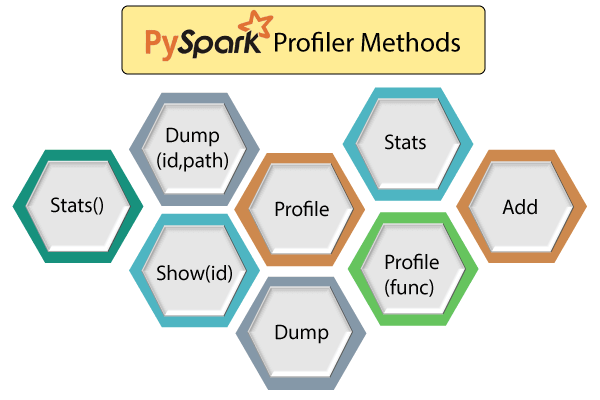

### Add
- The add method is used to add profile to the existing accumulated profile
- User should choose profile class at the time of creating a SparkContext.

In [4]:
from pyspark import SparkConf, SparkContext  
from pyspark import BasicProfiler

In [5]:
class MyCustomProfiler(BasicProfiler):  
    
    def show(self, id):  
           stats = self.stats()  
           if(stats):  
               print("=" * 60)  
               print("Profile of RDD<id=%d>" % id)  
               print("=" * 60)  
               stats.sort_stats("time", "cumulative").print_stats()  

In [6]:
SparkContext.getOrCreate().stop()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/24 02:00:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/05/24 02:00:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [7]:
conf = SparkConf().set("spark.python.profile", "true")
sc=SparkContext.getOrCreate(SparkContext(profiler_cls=MyCustomProfiler,conf=conf))

22/05/24 02:00:30 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [8]:
spark = SparkSession.builder._sparkContext(sc).getOrCreate()

In [20]:
sc.parallelize(range(1000)).map(lambda x: 2 * x).take(10)  
sc.parallelize(range(1000)).count()  
sc.show_profiles()

Profile of RDD<id=60>
         97 function calls (96 primitive calls) in 0.000 seconds

   Ordered by: internal time, cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 serializers.py:255(dump_stream)
        1    0.000    0.000    0.000    0.000 worker.py:607(process)
        4    0.000    0.000    0.000    0.000 {built-in method _pickle.dumps}
        1    0.000    0.000    0.000    0.000 serializers.py:213(load_stream)
        1    0.000    0.000    0.000    0.000 serializers.py:561(read_int)
        1    0.000    0.000    0.000    0.000 context.py:549(f)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        4    0.000    0.000    0.000    0.000 serializers.py:426(dumps)
      2/1    0.000    0.000    0.000    0.000 rdd.py:2917(pipeline_func)
        1    0.000    0.000    0.000    0.000 rdd.py:384(func)
        1    0.000    0.000    0.000    0.000 serializers.py:2

## Serializer

- Serialization takes an important role in the performance in distributed application, below is the explanation.

- Spark data is distributed on nodes and paratiions while using the transformations especially wide transformations reads the data from multiple nodes so the data/object/rdd transfers between the nodes.

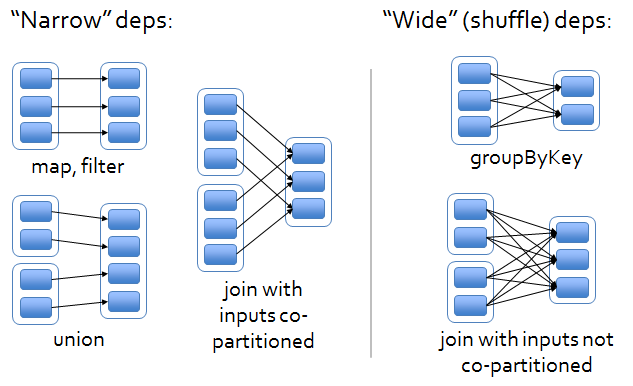

- The data transform from one node to another node the data movement part Serialization and Deserialization comes to the picture because data directly will not transfer between the nodes because nodes will run on a JVM so sender node and data receiver also a JVM.

- Note: Serialization will convert the bytes data so the transfer data much faster. (I/ O operation)

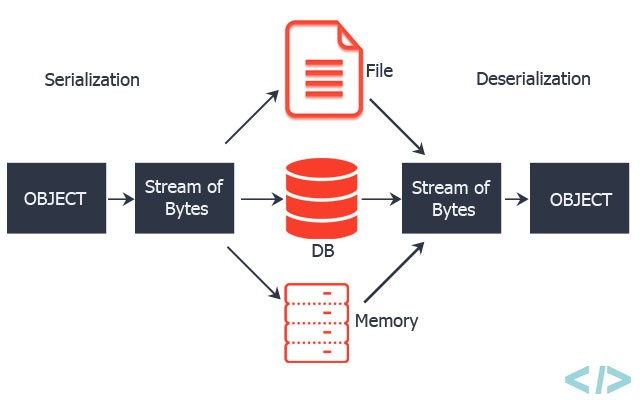

- Spark aims to strike a balance between convenience (allowing you to work with any Java type in your operations) and performance. It provides two serialization libraries:
    - Java serialization
    - Kryo serialization: Faster but does not support all Serializable types

In [24]:
from pyspark.serializers import PickleSerializer
from pyspark.serializers import MarshalSerializer
sc.stop()
conf = SparkConf().set("spark.python.profile", "true")
sc  = SparkContext(conf=conf, serializer=PickleSerializer())
spark = SparkSession(sc)

22/05/24 02:07:10 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [25]:
from pyspark.serializers import PickleSerializer
from pyspark.serializers import MarshalSerializer
sc.stop()
conf = SparkConf().set("spark.python.profile", "true")
sc  = SparkContext(conf=conf, serializer=MarshalSerializer())
spark = SparkSession(sc)

22/05/24 02:09:36 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
